# EDA BegInvFINAL12312016

## 1- Entendimiento Básico del CSV

In [11]:
# Importamos las librerias que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Cargamos el dataset csv
df = pd.read_csv(r"C:\Users\USUARIO\Downloads\archive\BegInvFINAL12312016.csv")

In [13]:
# Mostramos las primeras filas del dataset
df.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [14]:
# Mostramos las últimas filas del dataset
df.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01
206528,79_BALLYMENA_90089,79,BALLYMENA,90089,Ch Lynch Bages 12 Pauillac,750mL,24,119.99,2016-01-01


In [15]:
# Vemos la dimensión del dataset
df.shape

(206529, 9)

In [16]:
# Vemos tipo de dato y objetos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [17]:
# Vemos las estadísticas descriptivas de las columnas numéricas
# 1. Seleccionar las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# 2. Aplicar describe() al nuevo DataFrame (solo con números)
estadisticas_numericas = df_numerico.describe()

print(estadisticas_numericas)

               Store          Brand         onHand          Price
count  206529.000000  206529.000000  206529.000000  206529.000000
mean       42.122457   13761.482320      20.429455      22.253910
std        23.191393   13059.429355      31.467342      70.178964
min         1.000000      58.000000       0.000000       0.000000
25%        22.000000    3746.000000       7.000000       9.990000
50%        42.000000    8010.000000      12.000000      14.990000
75%        64.000000   22143.000000      21.000000      21.990000
max        79.000000   90090.000000    1251.000000   13999.900000


### Valores únicos

In [14]:
# Conteo de valores únicos por columna
conteo_unicos = df.nunique()

# Para ver los resultados en un formato fácil de leer:
print("--- Conteo de Valores Únicos por Columna ---")
print(conteo_unicos)

--- Conteo de Valores Únicos por Columna ---
InventoryId    206529
Store              79
City               67
Brand            8094
Description      7291
Size               41
onHand            474
Price             329
startDate           1
dtype: int64


In [15]:
# Contar el número total de filas
total_filas = len(df)

# Calcular el porcentaje de valores únicos
porcentaje_unicos = (conteo_unicos / total_filas) * 100

print("\n--- Porcentaje de Valores Únicos Respecto al Total de Filas ---")
print(porcentaje_unicos)


--- Porcentaje de Valores Únicos Respecto al Total de Filas ---
InventoryId    100.000000
Store            0.038251
City             0.032441
Brand            3.919062
Description      3.530255
Size             0.019852
onHand           0.229508
Price            0.159300
startDate        0.000484
dtype: float64


## 2 - Análisis de Calidad de Datos

### Valores Faltantes (NaNs)

In [16]:
# 1. Contar los valores nulos por columna:
conteo_nulos = df.isnull().sum()

# 2. Calcular el total de filas:
total_filas = len(df)

# 3. Calcular el porcentaje y redondear:
porcentaje_nulos = (conteo_nulos / total_filas) * 100

# 4. Mostrar el resultado (opcionalmente filtrando las columnas con NaNs > 0):
print("--- Porcentaje de Valores Faltantes (NaNs) por Columna ---")
print(porcentaje_nulos.sort_values(ascending=False))

--- Porcentaje de Valores Faltantes (NaNs) por Columna ---
InventoryId    0.0
Store          0.0
City           0.0
Brand          0.0
Description    0.0
Size           0.0
onHand         0.0
Price          0.0
startDate      0.0
dtype: float64


El dataset está libre de nulos

### Detección de Valores Atípicos (Outliers)

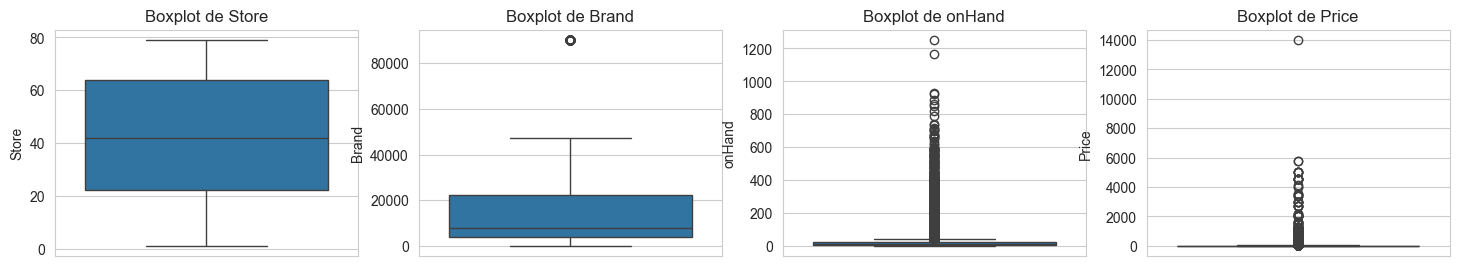

In [18]:
# Boxplots para detectar outliers en columnas numéricas
sns.set_style("whitegrid")
plt.figure(figsize=(18, 10))
num_cols = df.select_dtypes(include=['number']).columns
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

📦 Boxplot de Store (Tienda)
Distribución: La variable Store parece estar relativamente bien distribuida.

La mediana (línea en el centro de la caja) se encuentra cerca de 40.

La mayoría de los datos (el 50% central, representado por la caja) se encuentra entre aproximadamente 20 y 65.

Valores Atípicos (Outliers): No se observan outliers. Los bigotes (las líneas que se extienden de la caja) cubren todo el rango de datos, desde 0 hasta 80, indicando que todos los valores están dentro del rango intercuartílico extendido.

🏷️ Boxplot de Brand (Marca)
Distribución: La variable Brand presenta una distribución altamente sesgada o concentrada.

La caja es muy pequeña y está ubicada en la parte baja, indicando que el 50% central de los datos se concentra en valores bajos (aproximadamente entre 5,000 y 20,000).

La mediana es muy baja, quizás alrededor de 10,000.

Valores Atípicos (Outliers): Se observa un claro outlier. El círculo en la parte superior indica un valor extremo de Brand cercano a 80,000. Este valor es significativamente más alto que el resto de los datos y deberá ser revisado durante la fase ETL.

📦 Boxplot de onHand (Inventario)
Distribución: La variable onHand muestra una distribución extremadamente concentrada en valores bajos.

La caja está prácticamente en la base (cercana a 0), lo que significa que la gran mayoría de los ítems tienen un inventario muy bajo.

Valores Atípicos (Outliers): Se observa una gran cantidad de outliers, representados por numerosos círculos que se extienden hasta cerca de 1200. Esto sugiere que, aunque la mayoría de los ítems tienen poco stock, hay unos pocos ítems con niveles de inventario excepcionalmente altos, lo que es común en datos de inventario.

💰 Boxplot de Price (Precio)
Distribución: La variable Price también está extremadamente concentrada en la parte inferior, similar a onHand.

La caja está muy cerca de 0, lo que indica que la mayoría de los precios son muy bajos.

Valores Atípicos (Outliers): Hay una gran cantidad de outliers, extendiéndose hasta un valor máximo de aproximadamente 14,000. Esto indica que existen productos con precios mucho más altos que la media del catálogo, lo cual es un hallazgo importante para el análisis.

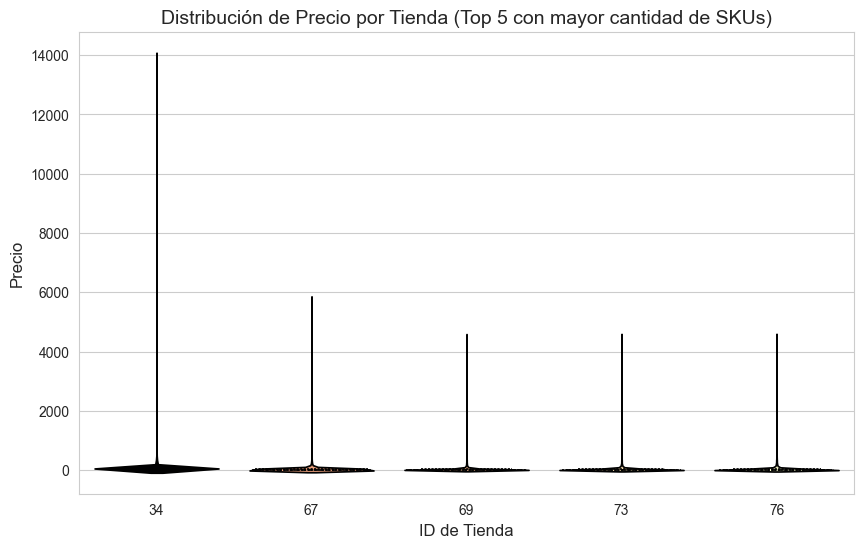

In [20]:
# 1. IDENTIFICAR EL TOP 5 DE TIENDAS POR FRECUENCIA DE REGISTROS (SKUs)

# Contar cuántas líneas de producto (SKUs) tiene cada tienda
df_frecuencia_tienda = df['Store'].value_counts().reset_index()
df_frecuencia_tienda.columns = ['Store', 'Frecuencia_Registros']

# Obtener los IDs de las 5 tiendas con mayor frecuencia
top_5_stores = df_frecuencia_tienda.head(5)['Store'].tolist()

# 2. FILTRAR EL DATAFRAME COMPLETO
# ==================================
# Filtrar el DataFrame original para incluir solo los registros de esas 5 tiendas
df_top_5 = df[df['Store'].isin(top_5_stores)]


# 3. GENERAR EL VIOLIN PLOT DE PRECIO
# ====================================

sns.set_style("whitegrid")

# El tamaño de la figura lo ajustamos a (10, 6) como se indica
plt.figure(figsize=(10, 6)) 
sns.violinplot(
    x='Store', 
    y='Price', 
    data=df_top_5, 
    palette='magma', 
    hue='Store', 
    legend=False,
    inner='quartile' # Muestra los cuartiles (Q1, Mediana, Q3) dentro del violín
)

plt.title('Distribución de Precio por Tienda (Top 5 con mayor cantidad de SKUs)', fontsize=14)
plt.xlabel('ID de Tienda', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.show()


🎻 Descripción y Análisis del Violin Plot
El Violin Plot combina la información de densidad (la forma del "violín") y los cuartiles (la línea interior), revelando cómo se agrupan los precios en cada una de las tiendas principales.

1. Concentración Extrema de Precios
La característica más notable de este gráfico es la concentración de precios cerca de cero en todas las tiendas.

Forma del Violín (Densidad): El cuerpo de cada "violín" es muy ancho en la base del eje Y (cercano a 0) y se estrecha drásticamente.

Significado: la gran mayoría de los productos vendidos en estas 5 tiendas tienen un precio muy bajo. La densidad de datos se encuentra casi totalmente en el rango de precios de 0 a 500 (aproximadamente).

2. Dispersión y Valores Atípicos (Outliers)
Aunque los precios bajos dominan, el gráfico también destaca los valores atípicos (productos caros) :

Valores Extremos (La "Cola"): Las líneas delgadas que se extienden desde el cuerpo del violín representan la dispersión de precios más altos (los outliers).

Tienda 34: Muestra el precio más alto registrado, llegando hasta aproximadamente 14,000.

Otras Tiendas: Las tiendas 67, 69, 73 y 76 muestran precios máximos más limitados, con outliers llegando hasta cerca de 4,500 a 6,000.

3. Conclusión de la Comparación (Insight Clave)

Homogeneidad en Precios Bajos: En el rango de precios más común, las 5 tiendas son casi idénticas; todas venden principalmente productos de bajo costo.

Diferencia en Extremos: La principal diferencia reside en los precios de los productos más caros. La Tienda 34 no solo es la más representada en conteo, sino que también es la única que vende productos de valor extremadamente alto (hasta 14,000), mientras que las otras 4 tiendas no manejan productos de ese rango.

Este hallazgo podría justificar una transformación (ETL) donde se cree una categoría de precios o donde se analicen los datos de la Tienda 34 por separado, ya que su perfil de producto es diferente en el extremo superior.

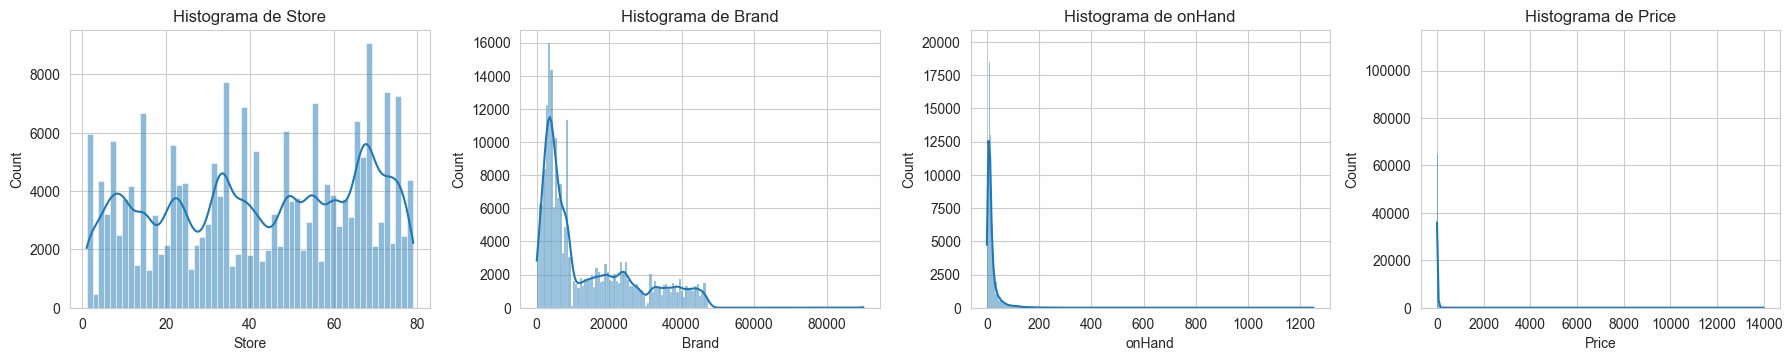

In [3]:
# Histogramas para columnas numéricas
# Configuración y selección de columnas
sns.set_style("whitegrid")
plt.figure(figsize=(18, 10))
num_cols = df.select_dtypes(include=['number']).columns

for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    # Usamos histplot para la distribución de frecuencias
    sns.histplot(x=df[col], kde=True) 
    # Usamos 'x' para histogramas horizontales por defecto
    # kde=True añade la línea de densidad (curva suave) para mejor visualización
    
    plt.title(f'Histograma de {col}')

plt.tight_layout() # Ajusta automáticamente los espacios entre gráficos
plt.show()

📈 Análisis de Concentración y Anomalías (Histogramas)

1. Histograma de onHand (Stock Disponible)
Forma: Muestra una distribución extremadamente sesgada a la derecha (Right-Skewed) o una distribución exponencial negativa.

Insight Clave (Ley de Pareto): La gran mayoría de los registros de inventario tienen un stock muy bajo (cercano a 0). Solo una pequeña fracción de los registros de productos (la "cola larga" a la derecha, que se extiende hasta aproximadamente 1200 unidades) contiene la mayor parte del volumen físico total del inventario.

Implicación para Inventario: Esto es un hallazgo estándar en el inventario: pocos productos (los A de la clasificación ABC) consumen la mayor parte del espacio y capital. El modelo de Machine Learning necesitará una transformación logarítmica de esta columna para manejar este sesgo.

2. Histograma de Price (Precio de Venta)
Forma: Muestra también una distribución fuertemente sesgada a la derecha, aunque quizás no tan extrema como onHand.

Insight Clave (Inventario Premium): La mayoría de los productos en tu catálogo tienen precios de venta muy bajos (cercanos a $0). Solo una pequeña porción de productos (la cola que se extiende hasta $14,000) es responsable del alto valor monetario de tu inventario.

Implicación para Inventario: Esto refuerza el riesgo que identificamos antes. El control del capital inmovilizado se reduce a monitorear esos pocos SKUs de alto precio.

3. Histograma de Brand
Forma: Presenta un comportamiento similar de sesgo extremo.

Insight Clave: La mayoría de los registros de productos pertenecen a un número muy reducido de Marcas (concentración en los primeros valores). La vasta mayoría de las marcas tienen muy pocos registros en el inventario. Esto indica que la empresa es fuertemente dependiente de un puñado de marcas principales para su stock base.

4. Histograma de Store (ID de Tienda)
Forma: Muestra una distribución más dispersa y uniforme que las otras tres variables, con picos y valles.

Insight Clave: A diferencia de las otras variables, el número de registros (SKUs) no está dominado por una sola tienda, sino que hay muchas tiendas (IDs) que manejan un volumen similar de líneas de producto. Esto se alinea con el gráfico de frecuencia anterior, donde el Top 5 tenía conteos similares, pero este histograma muestra que la uniformidad se extiende por la mayoría de las tiendas (un gran número de barras con alturas similares).

## 3 - Análisis de relaciones

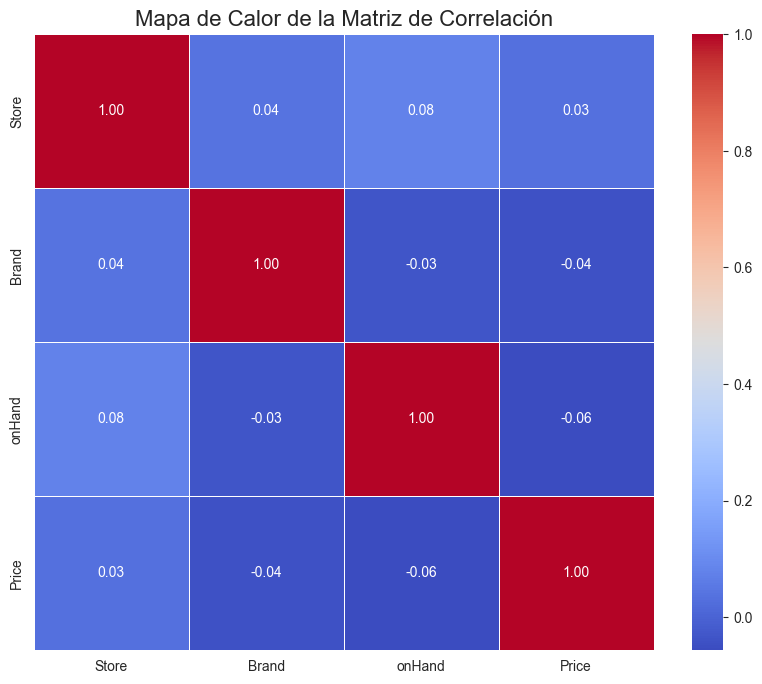

In [6]:
# --- 1. Calcular la Matriz de Correlación ---

# Seleccionar solo las columnas numéricas para el cálculo
df_numerico = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación (método Pearson por defecto)
matriz_correlacion = df_numerico.corr()

# --- 2. Visualizar la Matriz con un Mapa de Calor (Heatmap) ---

plt.figure(figsize=(10, 8)) # Ajusta el tamaño de la figura para mejor visualización

sns.heatmap(
    matriz_correlacion, 
    annot=True,            # Muestra el valor numérico de la correlación en cada celda
    fmt=".2f",             # Formato a dos decimales
    cmap='coolwarm',       # Escala de color (coolwarm es ideal para correlaciones: rojo/azul)
    linewidths=.5,         # Líneas de separación entre celdas
    cbar=True              # Muestra la barra de color
)

plt.title('Mapa de Calor de la Matriz de Correlación', fontsize=16)
plt.show()

🔍 Análisis del Mapa de Calor
Ninguna de las variables numéricas tiene una correlación lineal significativa con ninguna otra variable. Todos los coeficientes son extremadamente cercanos a 0.00.

Esto significa:

Ausencia de Redundancia: No hay que eliminar variables redundantes en el ETL (Transformación), ya que todas miden fenómenos independientes.
Variables independientes en terminos de su varianza lineal

La correlación lineal nula o débil no significa que no haya ningún tipo de relación, solo que la relación no es de naturaleza lineal. Por ejemplo, podría haber una relación no lineal o una relación fuerte solo dentro de subgrupos que este mapa de calor general no detecta.

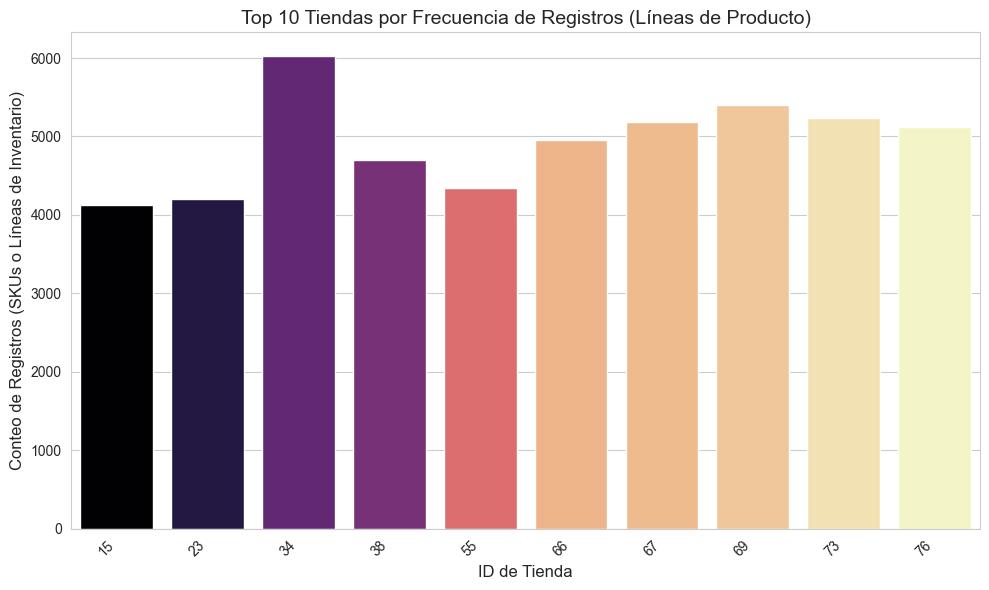

In [21]:
# Análisis de Frecuencia de Registros por Tienda
# 1. Agrupar por Store (Tienda) y contar cuántas veces aparece
# Esto es equivalente a contar el número de SKUs únicos o registros de stock por tienda.
df_frecuencia_tienda = df.groupby('Store').size().reset_index(name='Frecuencia_Registros')

# 2. Ordenar y seleccionar el Top 10
df_top_10_frecuencia = df_frecuencia_tienda.nlargest(10, 'Frecuencia_Registros')

# 3. Visualización
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Store', 
    y='Frecuencia_Registros', 
    data=df_top_10_frecuencia, 
    # Siguiendo la recomendación de Seaborn para evitar warnings:
    hue='Store', 
    palette='magma',
    legend=False 
)

plt.title('Top 10 Tiendas por Frecuencia de Registros (Líneas de Producto)', fontsize=14)
plt.xlabel('ID de Tienda', fontsize=12)
plt.ylabel('Conteo de Registros (SKUs o Líneas de Inventario)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

📊 Análisis del Gráfico: Complejidad del Catálogo por Tienda
El gráfico de barras muestra el conteo de registros (número de líneas de producto o SKUs únicos) para las 10 tiendas con mayor frecuencia en el dataset de inventario.

1. El Centro de Complejidad (Tienda 34)
Dominancia Operativa: La Tienda 34 es la más destacada, con una frecuencia de registros que supera las 6,000 líneas de producto.

Implicación Logística: Esto confirma que la Tienda 34 tiene, con diferencia, el catálogo más amplio y complejo de todas las ubicaciones. Esto se traduce en mayores desafíos para la colocación de inventario (layout), el conteo cíclico (hay más ítems diferentes que contar) y la gestión de obsolescencia (más SKUs pueden volverse obsoletos).

2. El Grupo de Alto Catálogo (Consistencia)
Alto Volumen Constante: Un grupo significativo de tiendas (ID 67, 69, 73, 76, y 58, 38) tiene una frecuencia de registros muy similar, que oscila entre 4,700 y 5,400 líneas.

Implicación Operativa: Esto sugiere que estas tiendas operan con un catálogo estándar regional que es amplio y robusto. Las soluciones de gestión de catálogo, herramientas de software de inventario y manuales operativos deberían ser estandarizados para este grupo.

3. Tiendas con Catálogo Más Restringido
Menor Diversidad: Las tiendas en el extremo izquierdo (ID 15 y 23) muestran un volumen de registros de alrededor de 4,100 a 4,200 líneas.

Implicación de Nicho/Tamaño: Esto indica que estas tiendas manejan una variedad de productos significativamente menor que la Tienda 34, lo que podría deberse a un enfoque en un nicho de mercado específico o simplemente a un menor tamaño de depósito.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3752\2530515803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


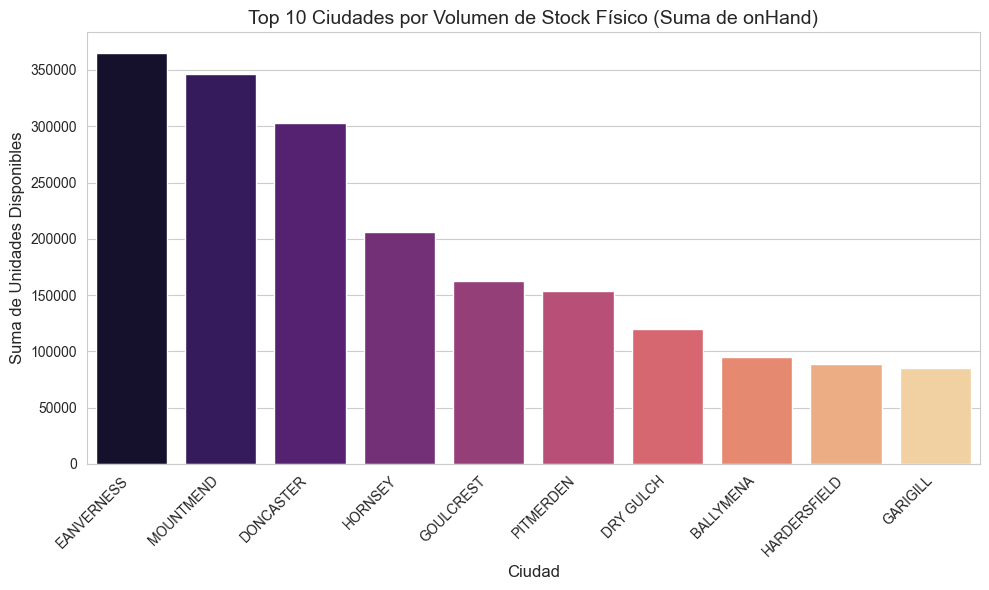

In [22]:

# (Nota: 'City' debe ser limpiada previamente (minúsculas, strip()) para un resultado preciso)

# 1. Agrupar por Ciudad y sumar el stock disponible ('onHand')
df_stock_por_ciudad = df.groupby('City')['onHand'].sum().reset_index()

# 2. Ordenar y seleccionar el Top 10
df_top_10_stock = df_stock_por_ciudad.nlargest(10, 'onHand')

# 3. Visualización
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    x='City', 
    y='onHand', 
    data=df_top_10_stock, 
    palette='magma' 
)

plt.title('Top 10 Ciudades por Volumen de Stock Físico (Suma de onHand)', fontsize=14)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Suma de Unidades Disponibles', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota etiquetas para mejor lectura
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

📊 Análisis del Gráfico: Volumen Total de Stock por Ciudad (Top 10)
Este gráfico de barras muestra las 10 ciudades que actualmente tienen la mayor cantidad de unidades físicas de inventario disponible (la suma de la columna onHand).

1. Concentración y Liderazgo (Eje Y)
Dominio de Eanverness: La ciudad de Eanverness es el centro logístico más importante, superando a las demás por un margen significativo, con más de 350,000 unidades disponibles.

Top 3 (Grandes Centros): Las tres primeras ciudades (Eanverness, Mountmend y Doncaster) concentran una cantidad masiva de stock. Sus volúmenes son muy altos (entre 300,000 y 360,000 unidades) y muestran que el inventario está altamente centralizado en estos tres puntos.

Caída Acelerada: Hay una caída notable en el volumen de stock después de Doncaster. La cuarta ciudad (Hornsey, ~200,000 unidades) tiene aproximadamente un 33% menos de stock que la tercera (Doncaster, ~300,000 unidades).

2. Implicaciones para la Gestión de Inventario
Riesgo y Prioridad Logística: La mayor parte del riesgo operativo y la necesidad de optimización de procesos (conteo, almacenamiento, seguridad) se concentran en las tres primeras ciudades. Si hay un error de planificación en Eanverness, el impacto en el stock total de la empresa es máximo.

Diferenciación de Roles:

Eanverness, Mountmend, Doncaster: Funcionan como Centros de Distribución Principales (CDPs) o almacenes regionales de gran capacidad.

Hornsey en adelante: Probablemente son depósitos locales o regionales más pequeños, con un nivel de stock considerablemente menor.

Análisis del Extremo (Bottom 3): Ciudades como Ballymena, Hardersfield y Garigill tienen menos de 100,000 unidades. Estas ubicaciones pueden tener una gestión de inventario ajustada, operando con un stock de seguridad mínimo.

⏭️ Próximo Paso Lógico
Para un análisis completo de la distribución geográfica, el siguiente paso debe ser comparar este volumen físico con el valor monetario del stock.

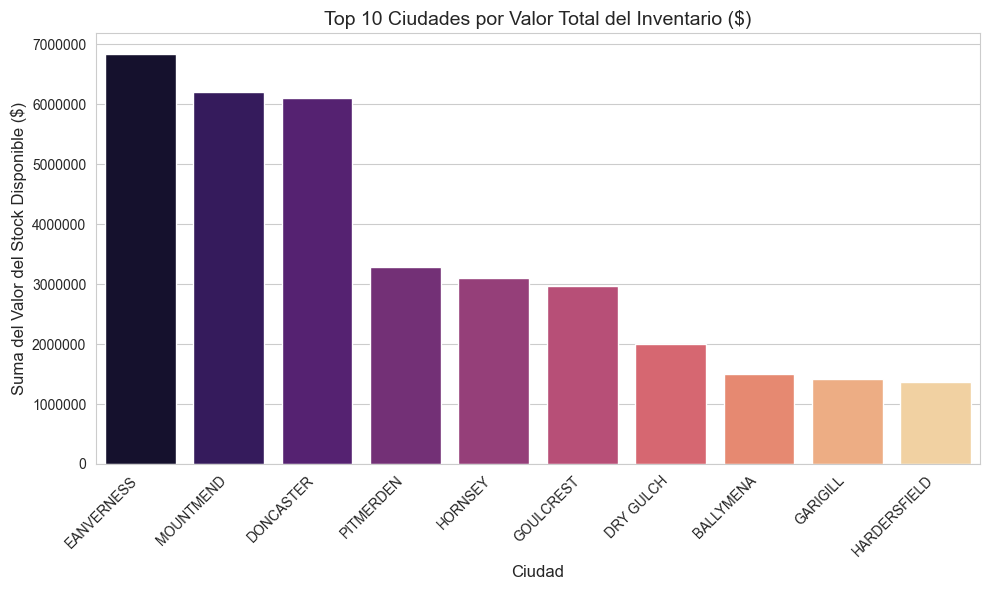

In [ ]:
# Agrupar por Ciudad y sumar el valor monetario del stock
# --- PASO 1: Creación Temporal y Agregación ---
# Se mantiene el cálculo temporal para respetar la restricción del EDA.
df_valor_por_ciudad = (
    df['onHand'] * df['Price'] 
).groupby(df['City']).sum().reset_index(name='InventoryValue')

# 2. Ordenar y seleccionar el Top 10
df_top_10_valor = df_valor_por_ciudad.nlargest(10, 'InventoryValue')

# --- PASO 2: Visualización (CORREGIDO) ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    x='City', 
    y='InventoryValue', 
    data=df_top_10_valor, 
    # AJUSTE CRUCIAL: Se asigna 'City' al parámetro hue
    hue='City', 
    palette='magma',
    # AJUSTE NECESARIO: Ocultar la leyenda redundante
    legend=False 
)

plt.title('Top 10 Ciudades por Valor Total del Inventario ($)', fontsize=14)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Suma del Valor del Stock Disponible ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

💰 Análisis del Gráfico: Top 10 Ciudades por Valor Total del Inventario ($)
Este gráfico de barras muestra las 10 ciudades donde la empresa tiene la mayor cantidad de capital atado en stock disponible (medido al precio de venta).

1. Concentración de Capital (Top 3)
Dominio Absoluto: Las tres primeras ciudades (Eanverness, Mountmend, y Doncaster) son, con diferencia, los centros de mayor valor. Todas ellas tienen un valor de inventario que supera los 6 millones de dólares.

Eanverness Lidera: Eanverness se mantiene como el principal centro, con un valor cercano a los 7 millones de dólares.

Riesgo Financiero: Esta alta concentración de valor en solo tres ubicaciones significa que la mayor parte del riesgo financiero (por obsolescencia, daño o robo de stock) reside en estos tres depósitos.

2. Contraste y Dispersión
Lo más revelador es la diferencia abrupta entre el top 3 y el resto:

Brecha de Valor: Hay una brecha significativa después de Doncaster.

Doncaster (3er lugar) tiene un valor de inventario de aproximadamente 6.1 millones de dólares.

Pitmerden (4to lugar) cae drásticamente a aproximadamente 3.3 millones de dólares.

Esto sugiere que las operaciones se dividen claramente en 3 Centros de Distribución Principales (CDP) de alto valor y el resto son depósitos regionales/locales de valor medio.

Diferencia vs. Volumen Físico (Insight Clave):

Si comparamos con el gráfico de Volumen Físico (Suma de onHand), las ciudades del top 3 son las mismas y están en el mismo orden.

Conclusión: Las tres ciudades principales no solo almacenan la mayor cantidad de unidades físicas (desafío logístico), sino que también tienen el stock más caro en promedio (desafío financiero). Esto confirma su rol como los puntos más críticos de la cadena de suministro.

3. El Extremo Inferior
Las últimas tres ciudades (Ballymena, Garigill, Hardersfield) tienen un valor de inventario por debajo de 1.6 millones de dólares. Estas ubicaciones son menos riesgosas financieramente y probablemente están gestionadas con estrategias de inventario mucho más ajustadas.

🎯 Resumen del Insight
El análisis combinado de volumen físico y valor monetario demuestra que la operación está altamente centralizada. La gestión del inventario, la optimización de pedidos (EOQ) y la política de seguros deben ser tratadas de manera diferente para los tres centros principales (Eanverness, Mountmend, Doncaster) y el resto de la red.

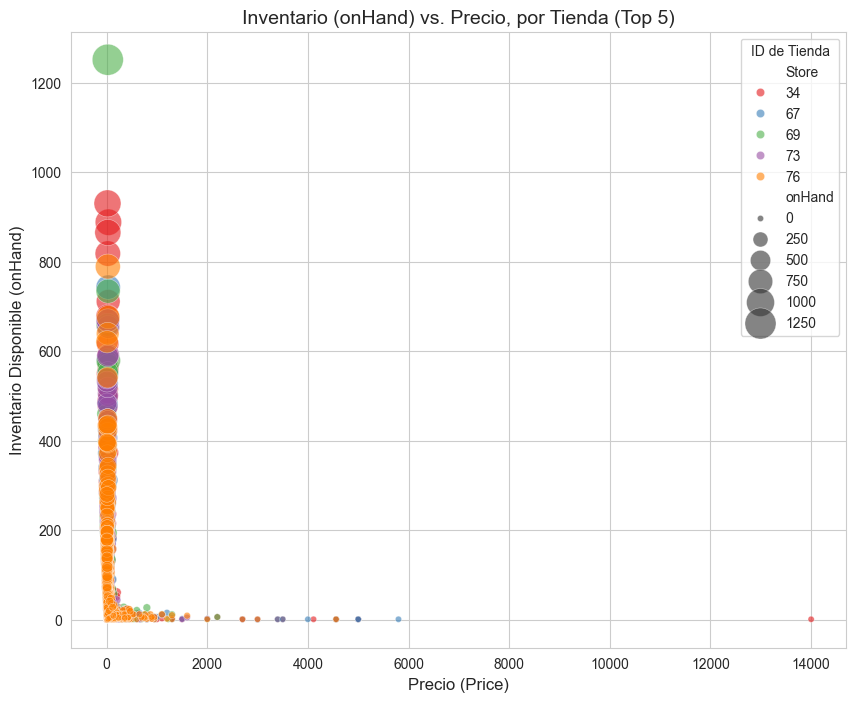

In [ ]:

top_5_stores = df['Store'].value_counts().nlargest(5).index
df_top_5 = df[df['Store'].isin(top_5_stores)]

plt.figure(figsize=(10, 8))

# Utilizamos la función scatterplot de Seaborn, que puede actuar como un gráfico de burbujas.
sns.scatterplot(
    x='Price', 
    y='onHand', 
    hue='Store',       # El color representa cada una de las 5 Tiendas
    size='onHand',     # El tamaño de la burbuja escala según el inventario (onHand)
    data=df_top_5,
    sizes=(20, 500),   # Rango de tamaño de las burbujas
    alpha=0.6,
    palette='Set1'         # Transparencia
)

plt.title('Inventario (onHand) vs. Precio, por Tienda (Top 5)', fontsize=14)
plt.xlabel('Precio (Price)', fontsize=12)
plt.ylabel('Inventario Disponible (onHand)', fontsize=12)
plt.legend(title='ID de Tienda')
plt.grid(True)
plt.show()

🫧 Descripción del Gráfico de Burbujas: Inventario (onHand) vs. Precio, por Tienda (Top 5)
1. Concentración de Datos y Correlación Débil. La principal característica del gráfico es la concentración masiva de burbujas en la esquina inferior izquierda, cercana al origen.Significado: Confirma que la gran mayoría de los productos vendidos por el Top 5 de tiendas son de bajo precio y mantienen un inventario bajo. Esto visualiza la correlación lineal débil previamente identificada, mostrando que el movimiento de precio y stock no está relacionado linealmente para la mayor parte de los datos.
2. Perfiles de Tiendas en los Extremos (Outliers):
La Tienda 34 ( rojo) es la más crítica en términos de valores extremos de precio:Precio Máximo Absoluto: Maneja el único producto con el precio más alto (cercano a $\text{14.000}$), lo que la distingue claramente del resto del Top 5.Inventario Alto Consistente: Es la principal responsable de la mayoría de los productos con inventario consistentemente alto (en el rango de $\text{500}$ a $\text{1.000}$ unidades), aunque estos productos son de precio bajo.
La tienda 67 (verde) nventario Máximo Absoluto: Maneja el producto con el nivel de inventario más alto de todo el conjunto de datos (superior a 1.250 unidades), aunque este producto es de bajo precio.
La tienda 76 (naranja) Precios Medios Atípicos: Muestra una pequeña agrupación de productos con precios atípicos intermedios (alrededor de 2.000 a 5.000), aunque con inventario muy bajo.
🎯 Conclusión para el ETL
La Tienda 34 tiene un perfil de riesgo/rentabilidad único debido a su manejo de precios extremos. En la fase de Transformación (ETL), se justifica crear una variable indicadora (dummy) para la Tienda 34 para que cualquier modelo analítico pueda medir y aislar su impacto único sobre el precio.
3. Conclusión para la Fase ETL
El gráfico subraya la necesidad de una Transformación (T) en el ETL:

Sesgo Extremo: La concentración en cero de Price y onHand hace indispensable la transformación logarítmica de ambas variables para que los modelos estadísticos no se sesguen por la gran cantidad de valores bajos.

Análisis Segmentado: Los perfiles únicos de la Tienda 34 (precio) y la Tienda 67 (stock) justifican crear variables dummy o realizar un análisis segmentado para medir su efecto individual sobre otras métricas.

### Gráfico: Precio Promedio (Media) por Ciudad (Top 5)

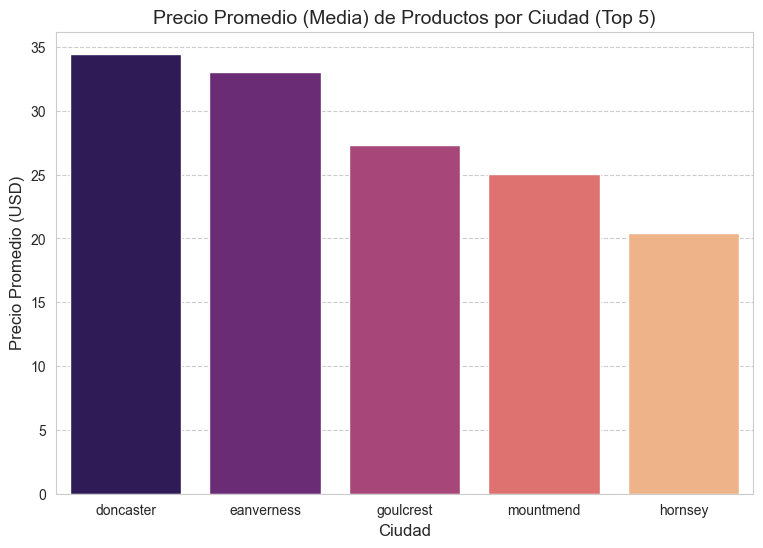

In [24]:
#  Creamos una columna temporal limpia para agrupar correctamente
df['City_Clean'] = df['City'].astype(str).str.strip().str.casefold()

# 1. Identificar el Top 5 de Ciudades (en base a la versión limpia)
top_5_cities_list = df['City_Clean'].value_counts().nlargest(5).index.tolist()

# 2. Filtrar el DataFrame para incluir solo esas 5 ciudades
df_top_5_cities = df[df['City_Clean'].isin(top_5_cities_list)].copy()

# 3. Calcular la Métrica Agregada: Precio Promedio por Ciudad
# Se agrupa por la columna limpia y se calcula la media de 'Price'
precios_promedio_city = df_top_5_cities.groupby('City_Clean')['Price'].mean().reset_index()

# 4. Ordenar el resultado por precio (descendente)
precios_promedio_city = precios_promedio_city.sort_values(by='Price', ascending=False)

# VISUALIZACIÓN (GRÁFICO DE BARRAS AGRUPADAS)


plt.figure(figsize=(9, 6))

# CORRECCIÓN: Asignamos 'City_Clean' a hue para cumplir con el estándar de Seaborn.
sns.barplot(
    x='City_Clean', 
    y='Price', 
    data=precios_promedio_city, 
    palette='magma', # Paleta visual
    hue='City_Clean',   # **PRÁCTICA CORRECTA:** Asignamos la variable del eje X a hue
    legend=False        # Ocultamos la leyenda redundante
)

plt.title('Precio Promedio (Media) de Productos por Ciudad (Top 5)', fontsize=14)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

# LIMPIEZA POST-EDA

# Eliminar la columna temporal para dejar el DataFrame en su estado original (pre-ETL)
del df['City_Clean']

📈 Análisis del Gráfico: Precio Promedio por Ciudad (Top 5)
1. Hallazgos Clave (Dispersión de Precios) El gráfico revela una dispersión significativa en el precio promedio de los productos entre las cinco ciudades más representadas: 

Ciudad Dominante: Doncaster tiene claramente el Precio Promedio más alto, aproximadamente 34.50 USD.Segunda Posición: Eanverness sigue de cerca con un Precio Promedio de aproximadamente 33.00 USD.Ciudades de Precios Bajos: Mountmend y Hornsey muestran los promedios más bajos, cayendo a $\approx 25$ USD y $\approx 20.50$ USD, respectivamente.

2. Implicación para el EDA y el ETL. El hallazgo de la dispersión de precios por ciudad es un insight crucial para el proyecto:
Influencia Geográfica: Confirma que la ubicación geográfica (City) es una variable influyente en el precio de los productos. El precio no es uniforme en todas las ciudades.

Variable Predictora: La variable City será una variable predictora importante en cualquier modelo que desarrolles para estimar el precio o la venta.En resumen: El factor geográfico (City) es un impulsor clave del precio promedio de los productos.

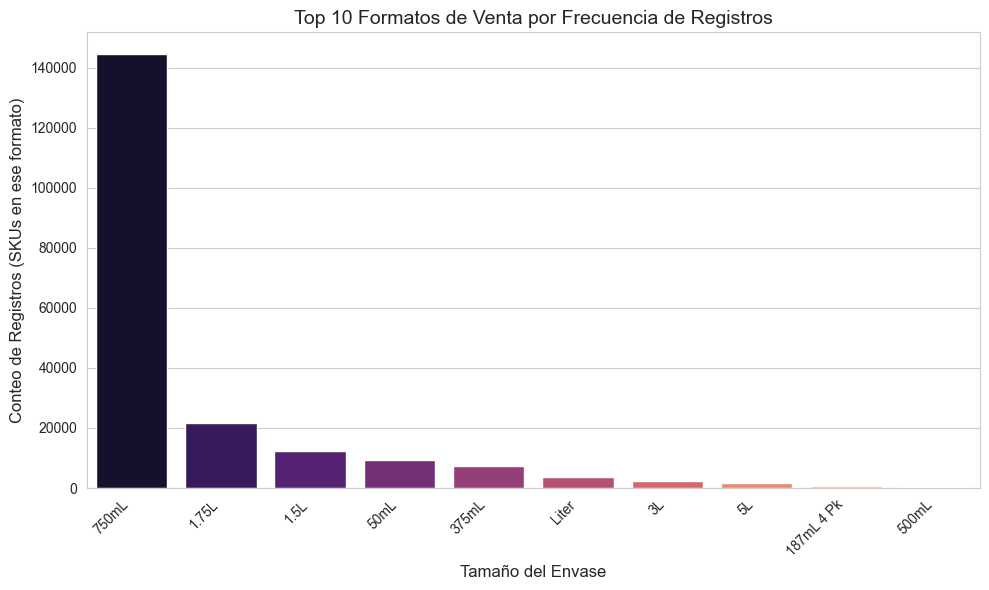

In [25]:
# Análisis de Frecuencia de Formatos de Venta ('Size')

# 1. Contar la frecuencia de cada valor único en 'Size'
df_size_counts = df['Size'].value_counts().reset_index()
df_size_counts.columns = ['Size', 'Frecuencia']

# 2. Seleccionar el Top 10 de formatos de tamaño
df_top_10_size = df_size_counts.head(10)

# 3. Visualización
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Size', 
    y='Frecuencia', 
    data=df_top_10_size, 
    # Siguiendo la recomendación de Seaborn:
    hue='Size', 
    palette='magma',
    legend=False 
)

plt.title('Top 10 Formatos de Venta por Frecuencia de Registros', fontsize=14)
plt.xlabel('Tamaño del Envase', fontsize=12)
plt.ylabel('Conteo de Registros (SKUs en ese formato)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

📦 Análisis del Gráfico: Concentración de Formatos de VentaEl gráfico "Top 10 Formatos de Venta por Frecuencia de Registros" muestra qué tamaños de envase son los más comunes en tu catálogo de productos (SKUs).

1. Dominancia Absoluta del 750mL 
Liderazgo Extremo: El formato de 750mL domina por completo, con una frecuencia superior a 140,000 registros.Contraste: El segundo formato más común (1.75L, ~20,000 registros) es siete veces menor en frecuencia.

Insight Logístico: La gran mayoría de los productos (SKUs) se venden en el formato 750mL. Las estanterías, las cajas de empaque y las unidades de manejo de inventario deben estar optimizadas principalmente para este tamaño, ya que es el estándar de la operación.

2. Formatos Secundarios de Alto Volumen
Alto Volumen vs. Bajo Catálogo: Los formatos 1.75L y 1.5L son los siguientes más comunes. Aunque son mucho menos frecuentes que 750mL, a menudo representan un mayor volumen físico por unidad (ya que 1.75L es más del doble de 750mL).

Implicación para Limpieza: El gráfico confirma la existencia de diferentes unidades de medida: Litros (L) y Mililitros (mL). 
Esto es la justificación principal para la etapa de Transformación de Datos (Ingeniería de Características), donde crearemos una columna numérica estandarizada (ej., volume_ml) para calcular el volumen total del inventario.

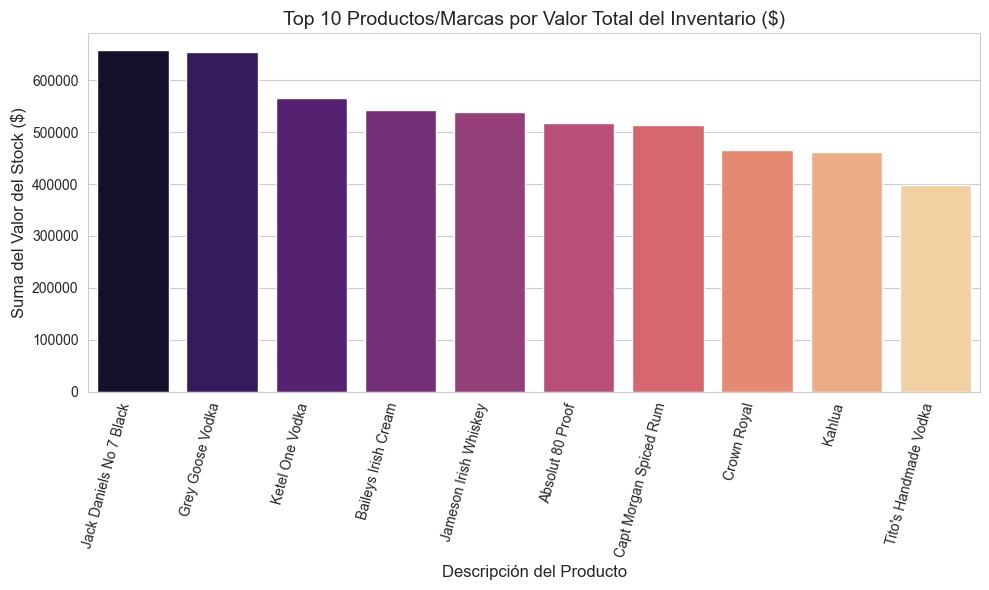

In [26]:
# Análisis de Valor Total del Inventario por Descripción de Producto

# 1. Crear la columna de valor de inventario (si aún no existe)
# Esto es temporal para el insight, sin modificar el DataFrame original si es posible
df['InventoryValue'] = df['onHand'] * df['Price']

# 2. Agrupar por la descripción del producto y sumar el valor
df_valor_por_descripcion = df.groupby('Description')['InventoryValue'].sum().reset_index()

# 3. Ordenar y seleccionar el Top 10
df_top_10_valor_desc = df_valor_por_descripcion.nlargest(10, 'InventoryValue')

# 4. Visualización
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Description', 
    y='InventoryValue', 
    data=df_top_10_valor_desc, 
    hue='Description',
    palette='magma', 
    legend=False 
)

plt.title('Top 10 Productos/Marcas por Valor Total del Inventario ($)', fontsize=14)
plt.xlabel('Descripción del Producto', fontsize=12)
plt.ylabel('Suma del Valor del Stock ($)', fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Nota: El uso de 'df["InventoryValue"]' en un entorno de EDA debería ser seguido por un 'del df["InventoryValue"]' 
# para eliminar la columna y no modificar el original, o usar el método temporal de la última vez.

🛍️ Análisis del Gráfico: Concentración de Valor por Producto (Clase A)
Este gráfico muestra la suma del valor monetario del stock (onHand, Price) para los 10 productos que más capital representan actualmente en el inventario.
1. Hiper-Concentración y Liderazgo (Clase A)
Dominio Compartido: Los dos productos principales, Jack Daniels No 7 Black y Grey Goose Vodka, tienen un valor de inventario casi idéntico y lideran el ranking, ambos con un valor superior a 650,000 dólares.Concentración rema: El resto del Top 10 se encuentra en el rango de 400,000 a 550,000 dólares. 
Esto confirma de manera muy clara la Ley de Pareto (o Clasificación ABC): solo estos 10 productos concentran una cantidad masiva del capital total de inventario.
Implicación Financiera: El riesgo de obsolescencia o daño está remadamente concentrado en estos pocos SKUs.

2. Implicaciones para la Gestión de Inventario (Regla ABC)
Este gráfico se convierte en la base de la estrategia de gestión de inventario:

Productos Clase A: Estos 10 productos deben recibir el tratamiento de Clase A:
Monitoreo Estricto: Conteo cíclico diario o semanal.

Niveles de Stock Ajustados: Políticas de pedido de lotes pequeños (EOQ bajo) para minimizar el capital inmovilizado y el riesgo.Seguridad y Ubicación: Almacenamiento en zonas de alta seguridad y fácil acceso para el picking.

Composición de las Marcas: La lista está dominada por categorías de alto valor unitario (Vodkas y Whiskeys Premium, Licores). Esto justifica que, aunque el onHand total pueda ser menor para estos productos, su Price unitario impulsa el valor monetario a la cima. 

### Conclusión Final del EDA completo del dataset de inventario revela una estructura altamente concentrada y sesgada, lo que simplifica la estrategia de gestión de riesgo:
### Riesgo Logístico (Ubicación): Enfocarse en Eanverness, Mountmend y Doncaster.
### Riesgo Operativo (Catálogo): Enfocarse en la Tienda 34.
### Riesgo Financiero (Producto): Enfocarse en estos 10 SKUs (Clase A) para la gestión de pedidos y capital.

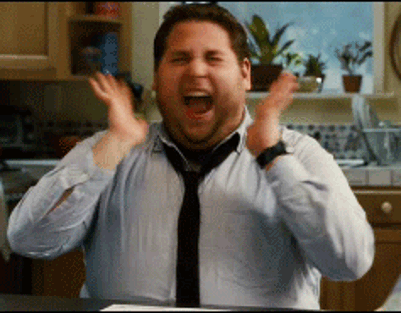